# HR dataset analysis project 


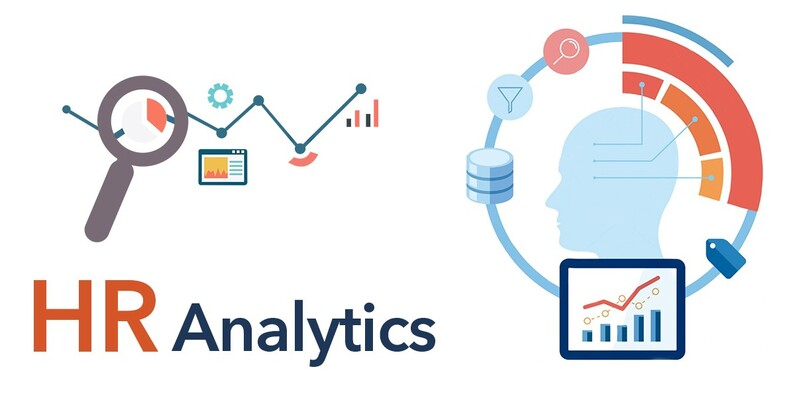

## import the  library's  

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [6]:
EducationLevel_table = pd.read_csv('EducationLevel.csv')
performance_table=pd.read_csv('PerformanceRating.csv')
Employee_table=pd.read_csv('Employee.csv')
Rating_table=pd.read_csv('RatingLevel.csv')
satisfied_table=pd.read_csv('SatisfiedLevel.csv')

In [4]:
Employee_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               1470 non-null   object
 1   FirstName                1470 non-null   object
 2   LastName                 1470 non-null   object
 3   Gender                   1470 non-null   object
 4   Age                      1470 non-null   int64 
 5   BusinessTravel           1470 non-null   object
 6   Department               1470 non-null   object
 7   DistanceFromHome (KM)    1470 non-null   int64 
 8   State                    1470 non-null   object
 9   Ethnicity                1470 non-null   object
 10  Education                1470 non-null   int64 
 11  EducationField           1470 non-null   object
 12  JobRole                  1470 non-null   object
 13  MaritalStatus            1470 non-null   object
 14  Salary                   1470 non-null  

In [3]:
performace_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   PerformanceID                    6709 non-null   object
 1   EmployeeID                       6709 non-null   object
 2   ReviewDate                       6709 non-null   object
 3   EnvironmentSatisfaction          6709 non-null   int64 
 4   JobSatisfaction                  6709 non-null   int64 
 5   RelationshipSatisfaction         6709 non-null   int64 
 6   TrainingOpportunitiesWithinYear  6709 non-null   int64 
 7   TrainingOpportunitiesTaken       6709 non-null   int64 
 8   WorkLifeBalance                  6709 non-null   int64 
 9   SelfRating                       6709 non-null   int64 
 10  ManagerRating                    6709 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 576.7+ KB


### merging performance table and employee table  

In [9]:
merged_df = Employee_table.merge (performance_table , on="EmployeeID", how="inner")

In [10]:
merged_df.head()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,PerformanceID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,PR1295,10/30/2016,3,3,2,3,0,4,3,3
1,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,PR1908,10/30/2017,4,4,5,3,1,2,3,2
2,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,PR2617,10/30/2018,5,5,4,3,0,4,5,5
3,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,PR3436,10/30/2019,1,3,2,3,1,3,5,4
4,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,PR411,10/31/2014,3,4,2,1,0,3,4,3


###  convert education column and rating column to str so we  mapping over them 

In [11]:
categorical_columns = [
    "Education", "SelfRating", "JobSatisfaction", "EnvironmentSatisfaction", 
    "RelationshipSatisfaction", "ManagerRating", "WorkLifeBalance"
]
merged_df[categorical_columns] = merged_df[categorical_columns].astype(str)

In [14]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   EmployeeID                       6709 non-null   object        
 1   FirstName                        6709 non-null   object        
 2   LastName                         6709 non-null   object        
 3   Gender                           6709 non-null   object        
 4   Age                              6709 non-null   int64         
 5   BusinessTravel                   6709 non-null   object        
 6   Department                       6709 non-null   object        
 7   DistanceFromHome (KM)            6709 non-null   int64         
 8   State                            6709 non-null   object        
 9   Ethnicity                        6709 non-null   object        
 10  Education                        6709 non-null   object     

### convert hiring date and review date to date type

In [13]:
date_columns = ["HireDate", "ReviewDate"]
for col in date_columns:
    if col in merged_df.columns:
        merged_df[col] = pd.to_datetime(merged_df[col])

### Update categorical columns with labels


In [15]:
category_mappings = {
    "Education": {
        "1": "No Formal Qualifications",
        "2": "High School",
        "3": "Bachelors",
        "4": "Masters",
        "5": "Doctorate"
    },
    "SelfRating": {
        "1": "Unacceptable",
        "2": "Needs Improvement",
        "3": "Meets Expectation",
        "4": "Exceeds Expectation",
        "5": "Above and Beyond"
    },
    "WorkLifeBalance": {
        "1": "Unacceptable",
        '2': "Needs Improvement",
        "3": "Meets Expectation",
        "4": "Exceeds Expectation",
        "5": "Above and Beyond"
    },
    "EnvironmentSatisfaction": {
        "1": "Very Dissatisfied",
        "2": "Dissatisfied",
        "3": "Meets Expectation",
        "4": "Exceeds Expectation",
        "5": "Above and Beyond"
    },
    "JobSatisfaction": {
        "1": "Very Dissatisfied",
        "2": "Dissatisfied",
        "3": "Neutral",
        "4": "Satisfied",
        "5": "Very Satisfied"
    },
    "RelationshipSatisfaction": {
        "1": "Very Dissatisfied",
        "2": "Dissatisfied",
        "3": "Neutral",
        "4": "Satisfied",
        "5": "Very Satisfied"
    },
    "ManagerRating": {
        "1": "Unacceptable",
        "2": "Needs Improvement",
        "3": "Meets Expectation",
        "4": "Exceeds Expectation",
        "5": "Above and Beyond"
    }
}

for col, mapping in category_mappings.items():
    merged_df[col] = merged_df[col].map(mapping)

### concat first and last name and drop first employee id  

In [ ]:
merged_df["FullName"] = merged_df["FirstName"] + " " + merged_df["LastName"]

# Drop FirstName, LastName, and EmployeeID
merged_df.drop(columns=["FirstName", "LastName", "EmployeeID"], inplace=True)

In [19]:
merged_df.insert(0, 'FullName', merged_df.pop('FullName'))


In [20]:
merged_df.head()

,FullName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,Education,EducationField,...,PerformanceID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
0,Leonelle Simco,Female,30,Some Travel,Sales,27,IL,White,Doctorate,Marketing,...,PR1295,2016-10-30,Meets Expectation,Neutral,Dissatisfied,3,0,Exceeds Expectation,Meets Expectation,Meets Expectation
1,Leonelle Simco,Female,30,Some Travel,Sales,27,IL,White,Doctorate,Marketing,...,PR1908,2017-10-30,Exceeds Expectation,Satisfied,Very Satisfied,3,1,Needs Improvement,Meets Expectation,Needs Improvement
2,Leonelle Simco,Female,30,Some Travel,Sales,27,IL,White,Doctorate,Marketing,...,PR2617,2018-10-30,Above and Beyond,Very Satisfied,Satisfied,3,0,Exceeds Expectation,Above and Beyond,Above and Beyond
3,Leonelle Simco,Female,30,Some Travel,Sales,27,IL,White,Doctorate,Marketing,...,PR3436,2019-10-30,Very Dissatisfied,Neutral,Dissatisfied,3,1,Meets Expectation,Above and Beyond,Exceeds Expectation
4,Leonelle Simco,Female,30,Some Travel,Sales,27,IL,White,Doctorate,Marketing,...,PR411,2014-10-31,Meets Expectation,Satisfied,Dissatisfied,1,0,Meets Expectation,Exceeds Expectation,Meets Expectation


In [21]:
merged_df.to_csv("cleaned_data.csv", index=False)